# Введение в OpenCV в задачах

Установите `OpenCV` внутри `conda` следующей командой (в командной строке):
```
conda install -c menpo opencv3
```
Перезапустите ядро (Kernel -> Restart)

Импортируйте модули и подключите отображение картинок в Jupyter:
```
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.dpi'] = 96
rcParams['figure.figsize'] = 10,3.3
```

In [1]:
from __future__ import (absolute_import, division, print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
%pylab inline

from pylab import rcParams
rcParams['figure.dpi'] = 96
rcParams['figure.figsize'] = 10, 3.3

Populating the interactive namespace from numpy and matplotlib


Загрузите в переменную `img` изображение `mandrill.png`

In [2]:
import cv2 as cv
img = cv.imread('images/mandrill.png')

Отобразите картинку с помощью функции `plt.imshow()`

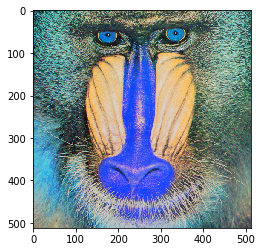

In [3]:
from matplotlib import pyplot as plt
plt.imshow(img)


С картинкой что-то не так... Поправьте это функцией `cv.cvtColor()` со вторым параметром `cv.COLOR_BGR2RGB`

In [4]:
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

Отобразите картинку ещё раз

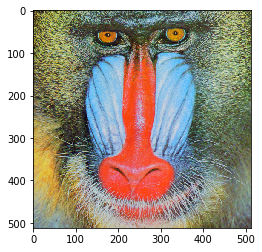

In [5]:
plt.imshow(img2,'gray')

Напечатайте свойства `shape`, `size` и `dtype` переменной `img`. Что представляет собой это "изображение"?

In [6]:
print(img.shape)
print(img.size)
print(img.dtype)

(512, 512, 3)
786432
uint8


Разделите каналы изображения функцией `cv.split()`. Сохраните результат в переменные `r,g,b`

In [7]:
b,g,r = cv.split(img2)

Отобразите отдельно красный канал. Добавьте в вызов функции параметр `cmap=plt.cm.gray`. Попробуйте другие варианты: сотрите слово gray и нажмите ТАВ - появится список доступных значений.

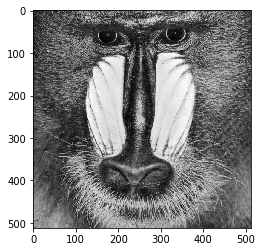

In [8]:
plt.imshow(r, cmap=plt.cm.gray)

Загрузите изображение `peppers.png` в переменную `img2`. Скорректируйте порядок каналов.

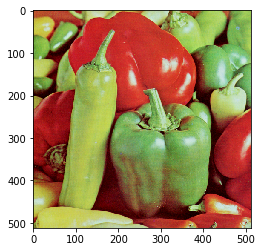

In [9]:
img3 = cv.imread('images/peppers.png')
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
plt.imshow(img3)

Отобразите сумму двух изображений, полученную тремя способами:
* сумма массивов numpy
* `cv.add()`
* `cv.addWeighted()` с весами 0.3 и 0.7

Объясните результат

_Замечание:_ результат выполнения функций можно передавать в `plt.imshow()`, не создавая переменных.

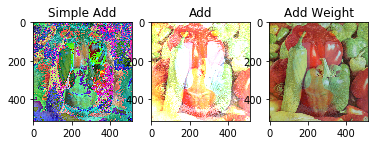

In [58]:
simpleSum = img2 + img3
weightSum = cv.addWeighted(img2,0.3,img3,0.7, 0)
summ = cv.add(img2,img3)

plt.subplot(231),plt.imshow(simpleSum,'gray'),plt.title('Simple Add')
plt.subplot(232),plt.imshow(summ,'gray'),plt.title('Add')
plt.subplot(233),plt.imshow(weightSum,'gray'),plt.title('Add Weight')
plt.show()

Переведите изображение в формат HSV и разделите результат на переменные `h,s,v`.

In [11]:
hsv = cv.cvtColor(img3, cv.COLOR_BGR2HSV)
h,s,v = cv.split(img3)

Отобразите переменную `h`. Добавьте вызов функции `plt.colorbar()` в той же ячейке - появится шкала соответствия цветов и значений

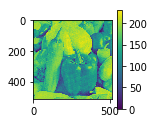

In [12]:
plt.subplot(231),plt.imshow(h), plt.colorbar()
plt.show()

Используя функцию `cv.inRange()`, создайте переменную `mask`, в которой будут только зелёные перцы. Используйте цветовую шкалу выше, чтобы подобрать пороговое значение

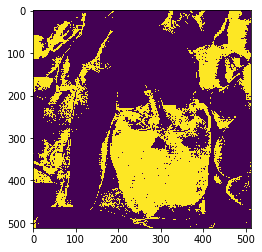

In [13]:
mask = cv.inRange(h, 90, 140)
plt.imshow(mask)

Примените побитовое И к маске и исходному изображению и отобразите результат. Поскольку изображение содержит три канала, а маска - один, то нужно использовать параметр `mask` функции `cv.bitwice_and()`.

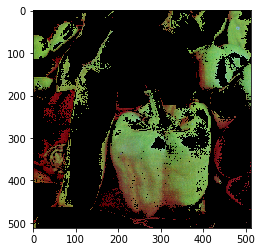

In [14]:
output = cv.bitwise_and(img3, img3, mask=mask)
plt.imshow(output)

## Бинаризация

Загрузите в переменную `doc` файл `images/document.jpg`. Добавьте в вызов функции `cv.imread()` параметр `cv.IMREAD_GRAYSCALE` - тогда OpenCV сам переведёт изображение в градации серого.

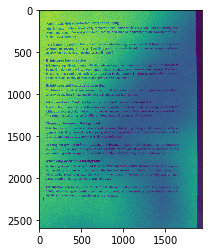

In [15]:
doc = cv.imread("images/document.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(doc)

Изображение большое, поэтому для наглядности возьмите фрагмент `doc[-800:-300,100:600]` и сохраните в переменную `doc_part`.

In [16]:
doc_part = doc[-800:-300,100:600]

Примените к изображению следующие методы:
* `cv.threshold()` с порогом 127
* `cv.adaptiveThreshold()` с усреднением
* `cv.adaptiveThreshold()` с усреднением Гаусса
* `cv.threshold()` с порогом, рассчитанным методом Оцу

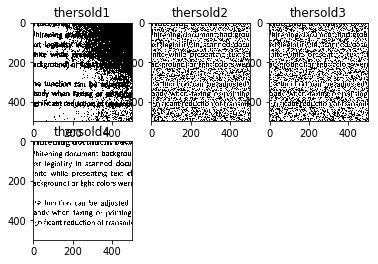

In [17]:
ret,thresh1 = cv.threshold(doc_part, 127, 255, cv.THRESH_BINARY)
retOtsu,thresh4 = cv.threshold(doc_part, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
thresh2 = cv.adaptiveThreshold(doc_part, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
thresh3 = cv.adaptiveThreshold(doc_part, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

plt.subplot(231),plt.imshow(thresh1,'gray'),plt.title('thersold1')
plt.subplot(232),plt.imshow(thresh2,'gray'),plt.title('thersold2')
plt.subplot(233),plt.imshow(thresh3,'gray'),plt.title('thersold3')
plt.subplot(234),plt.imshow(thresh4,'gray'),plt.title('thersold4')
plt.show()

Примените метод Оцу ко всему исходному изображению, а затем отобразите область `[-800:-300,100:600]`. Объясните результат.

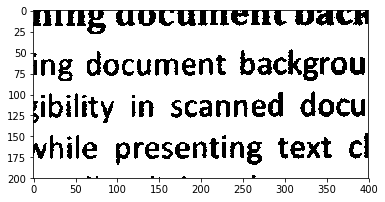

In [18]:
retOtsuAll,threshAll = cv.threshold(doc_part, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
doc_part2 = threshAll[-800:-300,100:600]
plt.imshow(doc_part2,'gray')

## Размывание

Загрузите квадрат 300х300 из файла `images/document2.jpg` в переменную `doc2`.

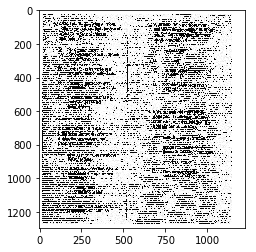

In [19]:
doc2 = cv.imread("images/document2.jpg")
plt.imshow(doc2,'gray')
doc2_part = threshAll[-800:-300,100:600]

Отобразите результат выполнения функций:
* `cv.filter2D()` с нормированным ядром 5х5 из единиц
* `cv.blur()`
* `cv.GaussianBlur()`
* `cv.medianBlur()`

Попробуйте разные значения параметров.

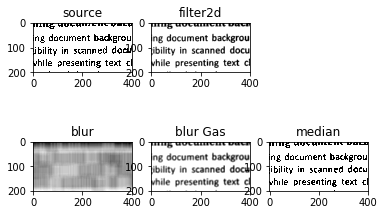

In [20]:
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(doc2_part, -1, kernel)
blur = cv.blur(doc2_part, (50,50))
blurGas = cv.GaussianBlur(doc2_part,(7,7),89)
median = cv.medianBlur(doc2_part, 5)


plt.subplot(231),plt.imshow(doc2_part,'gray'),plt.title('source')
plt.subplot(232),plt.imshow(dst,'gray'),plt.title('filter2d')
plt.subplot(234),plt.imshow(blur,'gray'),plt.title('blur')
plt.subplot(235),plt.imshow(blurGas,'gray'),plt.title('blur Gas')
plt.subplot(236),plt.imshow(median,'gray'),plt.title('median')
plt.show()

## Мат. морфология

Считайте изображение `images/resolution_chart.png` в режиме градаций серого. Инвертируйте его и примените порог Оцу. Сохраните результат  в переменную `chart`.

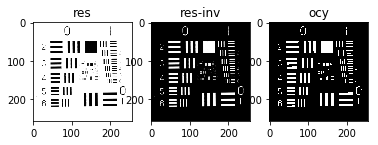

In [21]:
res = cv.imread("images/resolution_chart.png", cv.IMREAD_GRAYSCALE)
res_inv = cv.bitwise_not(res)
retOtsu, chart = cv.threshold(res_inv, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.subplot(231),plt.imshow(res,'gray'),plt.title('res')
plt.subplot(232),plt.imshow(res_inv,'gray'),plt.title('res-inv')
plt.subplot(233),plt.imshow(chart,'gray'),plt.title('ocy')
plt.show()

Создайте переменную `kernel`, равную `cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))`.

In [22]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))

Примените к изображению функцию `cv.morphologyEx()`, указав следующие операции:
* `cv.MORPH_DILATE`
* `cv.MORPH_ERODE`
* `cv.MORPH_OPEN`
* `cv.MORPH_CLOSE`
* `cv.MORPH_GRADIENT`
* `cv.MORPH_TOPHAT`
* `cv.MORPH_BLACKHAT`

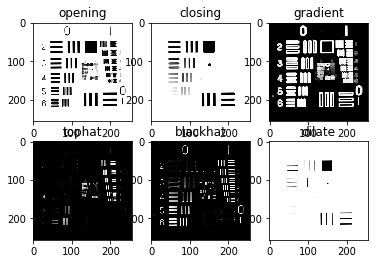

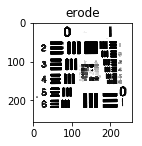

In [23]:
opening = cv.morphologyEx(res, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(res, cv.MORPH_CLOSE, kernel)
gradient = cv.morphologyEx(res, cv.MORPH_GRADIENT, kernel)
tophat = cv.morphologyEx(res, cv.MORPH_TOPHAT, kernel)
blackhat = cv.morphologyEx(res, cv.MORPH_BLACKHAT, kernel)
dilate = cv.morphologyEx(res, cv.MORPH_DILATE, kernel)
erode = cv.morphologyEx(res, cv.MORPH_ERODE, kernel)


plt.subplot(231),plt.imshow(opening,'gray'),plt.title('opening')
plt.subplot(232),plt.imshow(closing,'gray'),plt.title('closing')
plt.subplot(233),plt.imshow(gradient,'gray'),plt.title('gradient')
plt.subplot(234),plt.imshow(tophat,'gray'),plt.title('tophat')
plt.subplot(235),plt.imshow(blackhat,'gray'),plt.title('blackhat')
plt.subplot(236),plt.imshow(dilate,'gray'),plt.title('dilate')
plt.show()

plt.subplot(211),plt.imshow(erode,'gray'),plt.title('erode')
plt.show()

Проделайте то же, но с ядрами ELLIPSE и CROSS.

## Градиенты и рёбра

Примените к изображению `images/airplane2.png` операторы Собеля и Лапласса. Отобразите результаты на одном рисунке (используйте `plt.subplots()`).

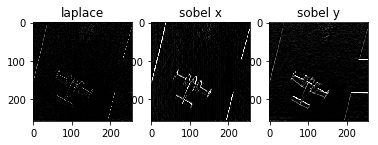

In [24]:
plane = cv.imread("images/airplane2.png")
laplacian = cv.Laplacian(plane, cv.CV_8U)
sobelx = cv.Sobel(plane, cv.CV_8U,1,0, ksize=3)
sobely = cv.Sobel(plane, cv.CV_8U,0,1, ksize=3)

plt.subplot(231),plt.imshow(laplacian), plt.title('laplace')
plt.subplot(232),plt.imshow(sobelx), plt.title('sobel x')
plt.subplot(233),plt.imshow(sobely), plt.title('sobel y')
plt.show()

Примените детектор рёбер Кэнни к изображениям самолёта и настроечной сетки (переменная `chart`). Проверьте, как влияют на результат значения порогов.

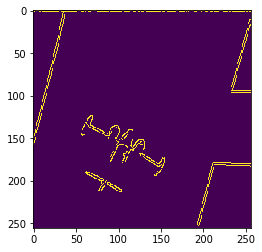

In [25]:
edges = cv.Canny(plane, 200, 300)
plt.imshow(edges)

## Контуры

Считайте в переменную `hier1` файл `images/hieroglyph.png`. 

In [26]:
hier1 = cv.imread("images/hieroglyph.png", cv.IMREAD_GRAYSCALE)


Преобразуйте его в градации серого, бинаризуйте и инвертируйте. Сохраните результат в переменную `hier2'.

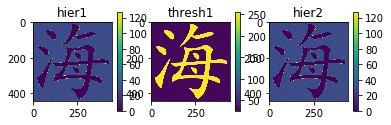

In [55]:
#thresh1 = cv.adaptiveThreshold(hier1, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
ret,thresh = cv.threshold(hier1, 127, 255,0)
hier2 = cv.bitwise_not(hier1, hier1, mask=thresh)

plt.subplot(231),plt.imshow(hier1), plt.colorbar(), plt.title('hier1')
plt.subplot(232),plt.imshow(thresh1), plt.colorbar(), plt.title('thresh1')
plt.subplot(233),plt.imshow(hier2), plt.colorbar(), plt.title('hier2')
plt.show()

Найдите на изображении все контуры

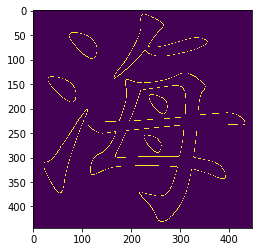

In [51]:
contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
#M = cv2.moments(cnt)
    
#edges = cv.Canny(hier2, 10, 90)
#plt.imshow(edges)

Нарисуйте все контуры поверх изображения `hier1`.

In [29]:
# Ваш код здесь

Используя функции `map()` и `cv.contourArea()`, напечатайте площадь всех контуров.

In [30]:
# Ваш код здесь

Получите выпуклую оболочку самого большого контура и нарисуйте её поверх исходного изображения.
    _Замечание:_ функция `cv.convexHull()` возвращает контур, поэтому рисовать его можно той же функцией `cv.drawContour()`

In [31]:
# Ваш код здесь

## Гистограммы

Загрузите файл `images/jelly_beans2.png` в переменную `jb`.

In [50]:
jb = cv.imread("images/jelly_beans2.png", cv.IMREAD_GRAYSCALE)

Отобразите гистограммы цветовых каналов. Используйте цикл `for` для вывода всех кривых на одном графике

In [33]:
# Ваш код здесь

Переведите изображение в модель HSV и проделайте то же самое.

In [34]:
# Ваш код здесь

Постройте двумерную гистограмму hue-saturation.

In [35]:
# Ваш код здесь

С помощью функции `cv.calcBackProject()` постройте маску, выделяющую только зелёные леденцы.

In [36]:
# Ваш код здесь

## Преобразование Хаффа

Загрузите файл `images/cube.png`. Сохраните результат в переменную `cube`.

In [37]:
# Ваш код здесь

Переведите изображение в градации серого и бинаризуйте с порогом 50. Последнее удобно делать функцией `cv.compare()`. Сохраните результат в переменную `cube2`.

In [38]:
# Ваш код здесь

Примените фильтр Кэнни с порогами 100 и 200.

In [39]:
# Ваш код здесь

Примените преобразование Хаффа с порогом 100. Нарисуйте полученные линии поверх исходного изображения.

In [40]:
# Ваш код здесь